# 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 사전추가

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "C:\Program Files\Java\jdk-19"

env: JAVA_HOME="C:\Program Files\Java\jdk-19"


In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
import os

os.chdir('/usr/local/lib/python3.7/dist-packages/konlpy/java')
os.getcwd()
os.makedirs('./aaa')

In [ ]:
os.getcwd()
os.chdir('/usr/local/lib/python3.7/dist-packages/konlpy/java/aaa')

In [ ]:
os.getcwd()

'/usr/local/lib/python3.7/dist-packages/konlpy/java/aaa'

In [ ]:
!jar xvf ../open-korean-text-2.1.0.jar

In [ ]:
with open(f"/usr/local/lib/python3.7/dist-packages/konlpy/java/aaa/org/openkoreantext/processor/util/noun/nouns.txt") as f:
    data = f.read()

In [ ]:
# 명사사전에 추가
data += '앵콜\n앵앵콜\n후드티\n데일리\n맨투맨\n스타일링\n오버핏\n가성비\n어디서나\n기능성\n리버시블\n빈티지\n무스탕\n캐주얼\n업사이클링\n속바지\n'

# 파일 새롭게 저장
with open("/usr/local/lib/python3.7/dist-packages/konlpy/java/aaa/org/openkoreantext/processor/util/noun/nouns.txt", 'w') as f:
    f.write(data)

In [ ]:
!jar cvf ../open-korean-text-2.1.0.jar *

In [ ]:
from konlpy.tag import Okt
okt = Okt()

# 텍스트 분석

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2022년 학술/크롤링데이터_0925_8월.csv')

In [ ]:
data['start_date'] = data['start_date'].apply(str)

In [ ]:
data['start_year'] = data['start_date'].str[:4]

In [ ]:
data['start_month'] = data['start_date'].str[4:6]

## pf 변수 생성

In [ ]:
pf = []
for i in data['achivement_rate']:
  if i >= 100:
    pf.append(1)
  else:
    pf.append(0)

In [ ]:
data['pf'] = pf
data.head()

,Unnamed: 0,title,maker,intro,main,post,comment,supporter,goal,term,achivement_rate,funding,like,img,start_date,finish_date,start_year,start_month,pf
0,0,"[14K l 18K] 내일이 더 가치있는 영원한 무드 ""한돈 클래식링""",스테이 컴퍼니,한철끼고 마는 반지는 이제 그만! 오늘보다 내일이 더 가치있는 영원한 무드 한돈 클...,안녕하세요. 스테이잼 브랜드를 운영하고 있는 대표 허재은입니다.주얼리는 인생의 전반...,11,18,85,1000000,2022.08.09-2022.08.16,3429,34290000,73,24,20220809,20220816,2022,08,1
1,1,좋은 소재로 바르게 설계한 정직한 안경 | 지아애체,지아애체,"ひろみ [ 히로미 : 아름답다 ] , つぎの鼻 [ 츠키코 : 달의 아이 ] 이번 프...",질리지 않는 디자인과 유려한 탄성으로오랫동안 사랑 받은 클래식 안경의 재해석클래식 ...,0,3,70,500000,2022.08.09-2022.08.16,1199,5999500,44,27,20220809,20220816,2022,08,1
2,2,[ 종료 즉시 배송 ] 썸머 쿨링 릴렉스 와이드 밴딩 팬츠 !,리버토우,앵콜 ! 여름 바지 끝판 왕 와이드 밴딩 팬츠 !! 가성비 최고의 바지 ! 패션도 ...,고중량 팬츠 드라이아이스 실험 비교썸머쿨링 와이드 팬츠 드라이아이스 실험 비교Q. ...,3,0,18,500000,2022.08.09-2022.08.16,139,695000,16,25,20220809,20220816,2022,08,1
3,3,"[생체역학 테스트완료] 북유럽의 편안함ㅣ한국 첫 런칭""GaitLine""",컨슈,[한국 최초 런칭] 전직 노르웨이 국가대표가 신체의 균형과 올바른 걸음을 위해 만든...,"안녕하세요, CONSHOE 입니다!CONSHOE는 부산신발산업진흥센터에 위치한 신발...",14,73,258,500000,2022.08.08-2022.08.18,9281,46405100,181,45,20220808,20220818,2022,08,1
4,4,바다와 일상의 경계를 허무는 수영복,인더노우,언제 어디서든 바다를 즐길 수 있는 2WAY 바다수영복! 이제 오늘의 바다를 내일...,안녕하세요.바다와 일상의 경계를 허무는 인더노우입니다.안녕하세요.제주바다를 너~무 ...,6,1,65,500000,2022.08.07-2022.08.16,1097,5489600,68,62,20220807,20220816,2022,08,1


## stop_word 설정

In [ ]:
stop_words = '위 더 수 나 내 이 차 점 개 감 울 움 의 단 착 그 때 노 종 것 스 벌 거 초 안 속 마 위해 로 줄 온 트 리 장 용 비 함 를 너 드 전 워 가지 어디 이상 순간 블'
stop_words = stop_words.split(' ')

In [ ]:
! pip install konlpy

In [ ]:
from konlpy.tag import Okt
okt = Okt()

okt_noun = []
for t_onoun in data['title']:
    for t_nouns in okt.nouns(t_onoun):
      if t_nouns not in stop_words:
        okt_noun.append(t_nouns)

In [ ]:
from konlpy.tag import Okt
okt = Okt()

okt_noun = []
for t_onoun in data['title']:
    for t_nouns in okt.nouns(t_onoun):
        okt_noun.append(t_nouns)

okt_tag = []
t_okt = []
for t_otag in data['title']:
    for t_tagg in okt.pos(t_otag):
        okt_tag.append(t_tagg)
    t_okt.append(okt_tag)
    okt_tag = []

In [ ]:
# 품사 비율
from collections import Counter

t_np = []
t_total = []
for j in range(0, len(t_okt)):
  for i in range(0,len(t_okt[j])):
    t_np.append(t_okt[j][i][1])
  t_total.append(Counter(t_np)) # Counter : 딕셔너리 형태랑 비슷해 보임
  t_np = []

In [ ]:
okt_title = pd.DataFrame(t_total).fillna(0)
okt_title
okt_title['pf'] = data['pf']
okt_title

,Punctuation,Number,Alpha,Noun,Josa,Adjective,Determiner,KoreanParticle,Verb,Modifier,...,Adverb,Foreign,Exclamation,Hashtag,Conjunction,VerbPrefix,Eomi,PreEomi,URL,pf
0,4.0,2.0,3.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4.0,0.0,1.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9964,1.0,0.0,0.0,10.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9965,2.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9966,0.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
okt_title.mean().sort_values()

URL               0.000100
PreEomi           0.001003
Eomi              0.001104
Conjunction       0.004414
VerbPrefix        0.005819
Exclamation       0.013744
Hashtag           0.023575
KoreanParticle    0.046549
Determiner        0.060494
Adverb            0.093499
Foreign           0.163323
Suffix            0.299559
Modifier          0.322733
Alpha             0.398776
Number            0.569823
Adjective         0.589888
pf                0.823535
Verb              0.965389
Josa              1.651384
Punctuation       2.511136
Noun              7.296248
dtype: float64

In [ ]:
okt_title.describe()

,Punctuation,Number,Alpha,Noun,Josa,Adjective,Determiner,KoreanParticle,Verb,Modifier,...,Adverb,Foreign,Exclamation,Hashtag,Conjunction,VerbPrefix,Eomi,PreEomi,URL,pf
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,...,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,2.511136,0.569823,0.398776,7.296248,1.651384,0.589888,0.060494,0.046549,0.965389,0.322733,...,0.093499,0.163323,0.013744,0.023575,0.004414,0.005819,0.001104,0.001003,0.000100,0.823535
std,1.459076,0.786117,0.797172,2.188200,1.200714,0.782282,0.253108,0.214925,0.944271,0.678081,...,0.311458,0.411790,0.127142,0.172756,0.066295,0.077369,0.033203,0.034684,0.010016,0.381234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,9.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,5.000000,9.000000,15.000000,7.000000,6.000000,3.000000,2.000000,6.000000,7.000000,...,3.000000,5.000000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000


## 단어 빈도 카운트

In [ ]:
from collections import Counter

reviews_nouns_counter = Counter(okt_noun)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100)) # 상위 100개를 딕셔너리 형태로 뽑아줘
top_reviews_nouns

## TF-IDF

In [ ]:
title = []
for d in data.title:
  title.append(d)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from konlpy.tag import Okt

okt = Okt()

tfidf = TfidfVectorizer(tokenizer=okt.nouns, stop_words=stop_words, max_features=100, min_df=5, max_df=0.5)

In [ ]:
document_term_matrix = tfidf.fit_transform(title)

In [ ]:
tf = pd.DataFrame(document_term_matrix.toarray(), columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## TF-IDF에 다가 pf변수 넣어서 모델링

In [ ]:
tf

,가격,가방,가성비,가죽,감성,겨울,기능,기능성,끝,끝판,...,프로젝트,프리미엄,핏,하나,하나로,한국,한복,한정,핸드,후드
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.737816,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
#tf.to_csv('/content/drive/MyDrive/2022년 학술/tf1.csv', index = False)

In [ ]:
tf['pf'] = data['pf']

In [ ]:
tf

,가격,가방,가성비,가죽,감성,겨울,기능,기능성,끝,끝판,...,프리미엄,핏,하나,하나로,한국,한복,한정,핸드,후드,pf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.737816,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
9964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
9965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
9966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [ ]:
x_data = tf.drop(['pf'], axis=1)
y_data = tf['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

### XGB

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1227
           1       0.82      1.00      0.90      5750

    accuracy                           0.82      6977
   macro avg       0.91      0.50      0.45      6977
weighted avg       0.86      0.82      0.75      6977

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.82      1.00      0.90      2459

    accuracy                           0.82      2991
   macro avg       0.41      0.50      0.45      2991
weighted avg       0.68      0.82      0.74      2991



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


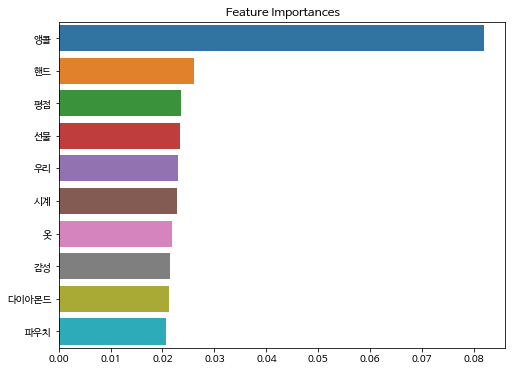

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_predict_train = xgb.predict(x_train)
y_predict = xgb.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
xgb_top  =ftr_top

In [ ]:
xgb_top

앵콜       0.081830
핸드       0.025993
평점       0.023601
선물       0.023452
우리       0.022966
시계       0.022800
옷        0.021850
감성       0.021417
다이아몬드    0.021285
파우치      0.020602
dtype: float32

### GBT

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1227
           1       0.83      1.00      0.90      5750

    accuracy                           0.83      6977
   macro avg       0.91      0.51      0.46      6977
weighted avg       0.86      0.83      0.75      6977

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.82      1.00      0.90      2459

    accuracy                           0.82      2991
   macro avg       0.41      0.50      0.45      2991
weighted avg       0.68      0.82      0.74      2991



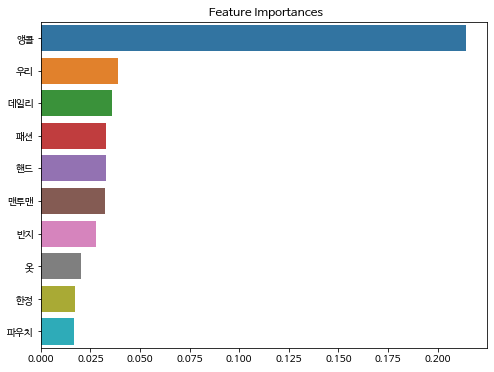

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
gbt_top  =ftr_top

### RF

              precision    recall  f1-score   support

           0       0.94      0.45      0.61      1227
           1       0.89      0.99      0.94      5750

    accuracy                           0.90      6977
   macro avg       0.92      0.72      0.77      6977
weighted avg       0.90      0.90      0.88      6977

              precision    recall  f1-score   support

           0       0.22      0.04      0.07       532
           1       0.82      0.97      0.89      2459

    accuracy                           0.80      2991
   macro avg       0.52      0.51      0.48      2991
weighted avg       0.72      0.80      0.74      2991



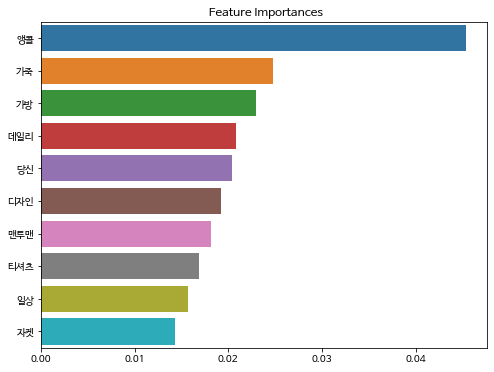

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_predict_train = rf.predict(x_train)
y_predict = rf.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
rf_top  =ftr_top

### LGBM

              precision    recall  f1-score   support

           0       0.94      0.45      0.61      1227
           1       0.89      0.99      0.94      5750

    accuracy                           0.90      6977
   macro avg       0.92      0.72      0.77      6977
weighted avg       0.90      0.90      0.88      6977

              precision    recall  f1-score   support

           0       0.22      0.04      0.07       532
           1       0.82      0.97      0.89      2459

    accuracy                           0.80      2991
   macro avg       0.52      0.51      0.48      2991
weighted avg       0.72      0.80      0.74      2991



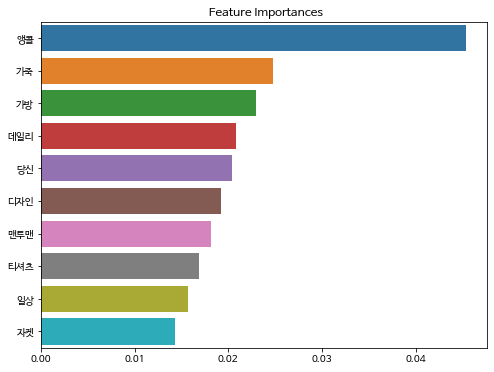

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
lgbm = RandomForestClassifier(random_state=42)
lgbm.fit(x_train, y_train)
y_predict_train = lgbm.predict(x_train)
y_predict = lgbm.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
lgbm_top  =ftr_top

In [ ]:
for i in xgb_top.index:
    if (i in lgbm_top.index) and (i in rf_top.index) and (i in gbt_top.index):
        print(i)

앵콜


### 앵콜, 데일리, 맨투맨, 가죽

In [ ]:
x_data = tf[['앵콜','데일리','맨투맨','가죽']]
y_data = tf['pf']

In [ ]:
x_data

,앵콜,데일리,맨투맨,가죽
0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0
...,...,...,...,...
9963,0.528866,0.0,0.0,0.0
9964,0.000000,0.0,0.0,0.0
9965,0.000000,0.0,0.0,0.0
9966,0.000000,0.0,0.0,0.0


#### xgb

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.01      0.01      1227
           1       0.83      1.00      0.90      5750

    accuracy                           0.82      6977
   macro avg       0.81      0.50      0.46      6977
weighted avg       0.82      0.82      0.75      6977

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.82      1.00      0.90      2459

    accuracy                           0.82      2991
   macro avg       0.41      0.50      0.45      2991
weighted avg       0.68      0.82      0.74      2991



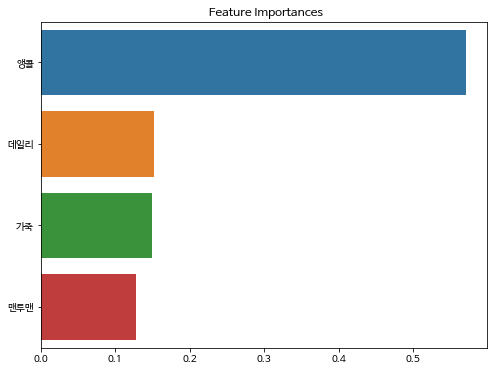

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_predict_train = xgb.predict(x_train)
y_predict = xgb.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

#### gbt

              precision    recall  f1-score   support

           0       0.97      0.03      0.06      1227
           1       0.83      1.00      0.91      5750

    accuracy                           0.83      6977
   macro avg       0.90      0.52      0.48      6977
weighted avg       0.85      0.83      0.76      6977

              precision    recall  f1-score   support

           0       0.09      0.00      0.00       532
           1       0.82      1.00      0.90      2459

    accuracy                           0.82      2991
   macro avg       0.46      0.50      0.45      2991
weighted avg       0.69      0.82      0.74      2991



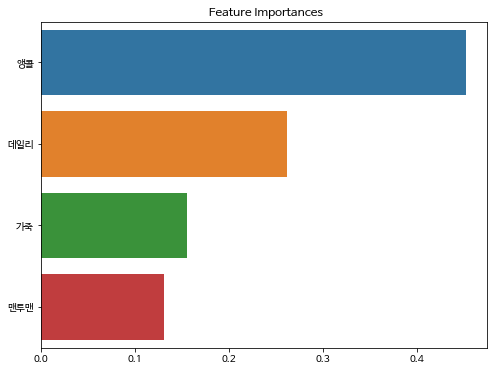

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

#### RF

              precision    recall  f1-score   support

           0       0.91      0.14      0.24      1227
           1       0.84      1.00      0.91      5750

    accuracy                           0.85      6977
   macro avg       0.88      0.57      0.57      6977
weighted avg       0.85      0.85      0.79      6977

              precision    recall  f1-score   support

           0       0.17      0.03      0.05       532
           1       0.82      0.97      0.89      2459

    accuracy                           0.80      2991
   macro avg       0.50      0.50      0.47      2991
weighted avg       0.71      0.80      0.74      2991



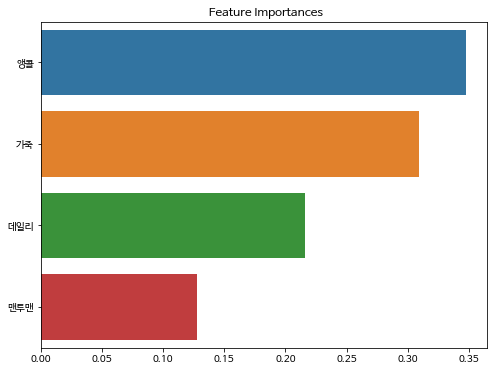

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_predict_train = rf.predict(x_train)
y_predict = rf.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

#### lgbm

              precision    recall  f1-score   support

           0       0.91      0.14      0.24      1227
           1       0.84      1.00      0.91      5750

    accuracy                           0.85      6977
   macro avg       0.88      0.57      0.57      6977
weighted avg       0.85      0.85      0.79      6977

              precision    recall  f1-score   support

           0       0.17      0.03      0.05       532
           1       0.82      0.97      0.89      2459

    accuracy                           0.80      2991
   macro avg       0.50      0.50      0.47      2991
weighted avg       0.71      0.80      0.74      2991



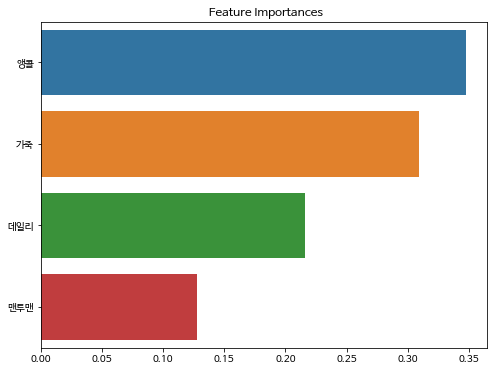

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
lgbm = RandomForestClassifier(random_state=42)
lgbm.fit(x_train, y_train)
y_predict_train = lgbm.predict(x_train)
y_predict = lgbm.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## TF-IDF 기준 상위 n_top 개수 키워드 추출

In [ ]:
import numpy as np

In [ ]:
# TF-IDF 기준 상위 n_top 개수 키워드 추출
n_top = 10
importance = np.argsort(np.asarray(document_term_matrix.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(tfidf.get_feature_names())
print(tfidf_feature_names[importance[:n_top]])

['앵콜' '가방' '가죽' '안경' '명품' '티셔츠' '마스크' '당신' '자켓' '디자인']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# okt_total 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2022년 학술/okt_total.csv')

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,...,생산자물가(전월대비%),동행지수순환변동치(경기종합지수),선행지수순환변동치(경기종합지수),소비자물가(전년도대비%),취업자증감(%),실업률(%),청년실업률(%),경제성장률(실질GDP성장률),covid,pf
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,1000000,24,40,...,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,500000,27,28,...,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,25,35,...,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,149849.0,1
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,500000,45,39,...,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,55242.0,1
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,500000,62,19,...,8.2,102.3,99.3,5.7,80.7,2.1,5.4,3.1,105455.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1000000,152,40,...,9.2,101.8,99.5,6.3,82.6,2.9,6.8,2.9,35852.0,0
9964,1.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,136,38,...,9.2,101.8,99.5,6.3,82.6,2.9,6.8,2.9,68588.0,1
9965,2.0,1.0,9.0,0.0,1.0,0.0,0.0,500000,46,34,...,9.2,101.8,99.5,6.3,82.6,2.9,6.8,2.9,68588.0,1
9966,0.0,0.0,3.0,0.0,0.0,0.0,0.0,500000,49,19,...,9.2,101.8,99.5,6.3,82.6,2.9,6.8,2.9,12672.0,1


## 변수 제거

In [ ]:
del df['동행지수순환변동치(경기종합지수)']
del df['소비자물가(전년도대비%)']
del df['취업자증감(%)']
del df['실업률(%)']
del df['청년실업률(%)']

In [ ]:
del df['생산자물가(전월대비%)']

In [ ]:
df.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9.968000e+03,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,2.511136,0.569823,7.218800,0.046549,0.965991,0.093299,0.163323,1.432566e+06,50.191914,34.944723,18.349017,99.678331,1.862721,13109.049157,0.823535
std,1.459076,0.786117,2.169218,0.214925,0.944187,0.310873,0.411790,3.740636e+06,34.758015,6.100135,7.750581,1.199472,2.407586,51181.653078,0.381234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,5.000000,3.000000,97.900000,-2.500000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,26.000000,32.000000,13.000000,98.600000,-0.900000,15.000000,1.000000
50%,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,43.000000,37.000000,18.000000,99.600000,2.200000,320.000000,1.000000
75%,3.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,66.000000,40.000000,22.000000,100.600000,3.000000,1507.000000,1.000000
max,9.000000,5.000000,14.000000,2.000000,6.000000,3.000000,5.000000,1.000000e+08,317.000000,40.000000,83.000000,101.900000,6.200000,621136.000000,1.000000


In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,1000000,24,40,7,99.3,3.1,149849.0,1
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,500000,27,28,7,99.3,3.1,149849.0,1
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,25,35,7,99.3,3.1,149849.0,1
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,500000,45,39,10,99.3,3.1,55242.0,1
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,500000,62,19,9,99.3,3.1,105455.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1000000,152,40,31,99.5,2.9,35852.0,0
9964,1.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,136,38,31,99.5,2.9,68588.0,1
9965,2.0,1.0,9.0,0.0,1.0,0.0,0.0,500000,46,34,40,99.5,2.9,68588.0,1
9966,0.0,0.0,3.0,0.0,0.0,0.0,0.0,500000,49,19,42,99.5,2.9,12672.0,1


## 선행지수순환변동치(경기종합지수), covid log scale

In [ ]:
import numpy as np

In [ ]:
df_log1 = np.log10(df.filter(['선행지수순환변동치(경기종합지수)']))
df_log2 = np.log10(df.filter(['covid'])+1)
#df_log3 = np.log10(df.filter(['covid'])+1)
df_log = pd.concat([df_log1, df_log2], axis = 1)

In [ ]:
del df['선행지수순환변동치(경기종합지수)']
del df['covid']

In [ ]:
df_log.describe()

,선행지수순환변동치(경기종합지수),covid
count,9968.000000,9968.000000
mean,1.998569,2.212249
std,0.005218,1.510894
min,1.990783,0.000000
25%,1.993877,1.204120
50%,1.998259,2.506505
75%,2.002598,3.178401
max,2.008174,5.793187


In [ ]:
df1 = pd.concat([df, df_log], axis = 1)

In [ ]:
df1

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,경제성장률(실질GDP성장률),pf,선행지수순환변동치(경기종합지수),covid
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,1000000,24,40,7,3.1,1,1.996949,5.175657
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,500000,27,28,7,3.1,1,1.996949,5.175657
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,25,35,7,3.1,1,1.996949,5.175657
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,500000,45,39,10,3.1,1,1.996949,4.742277
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,500000,62,19,9,3.1,1,1.996949,5.023071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1000000,152,40,31,2.9,0,1.997823,4.554526
9964,1.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,136,38,31,2.9,1,1.997823,4.836254
9965,2.0,1.0,9.0,0.0,1.0,0.0,0.0,500000,46,34,40,2.9,1,1.997823,4.836254
9966,0.0,0.0,3.0,0.0,0.0,0.0,0.0,500000,49,19,42,2.9,1,1.997823,4.102879


In [ ]:
df1.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,경제성장률(실질GDP성장률),pf,선행지수순환변동치(경기종합지수),covid
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9.968000e+03,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,2.511136,0.569823,7.218800,0.046549,0.965991,0.093299,0.163323,1.432566e+06,50.191914,34.944723,18.349017,1.862721,0.823535,1.998569,2.212249
std,1.459076,0.786117,2.169218,0.214925,0.944187,0.310873,0.411790,3.740636e+06,34.758015,6.100135,7.750581,2.407586,0.381234,0.005218,1.510894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,5.000000,3.000000,-2.500000,0.000000,1.990783,0.000000
25%,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,26.000000,32.000000,13.000000,-0.900000,1.000000,1.993877,1.204120
50%,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,43.000000,37.000000,18.000000,2.200000,1.000000,1.998259,2.506505
75%,3.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,66.000000,40.000000,22.000000,3.000000,1.000000,2.002598,3.178401
max,9.000000,5.000000,14.000000,2.000000,6.000000,3.000000,5.000000,1.000000e+08,317.000000,40.000000,83.000000,6.200000,1.000000,2.008174,5.793187


### gbt

In [ ]:
x_data = df1.drop(['pf'], axis=1)
y_data = df1['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.73      0.30      0.43      1227
           1       0.87      0.98      0.92      5750

    accuracy                           0.86      6977
   macro avg       0.80      0.64      0.67      6977
weighted avg       0.84      0.86      0.83      6977

              precision    recall  f1-score   support

           0       0.68      0.25      0.37       532
           1       0.86      0.97      0.91      2459

    accuracy                           0.85      2991
   macro avg       0.77      0.61      0.64      2991
weighted avg       0.83      0.85      0.82      2991



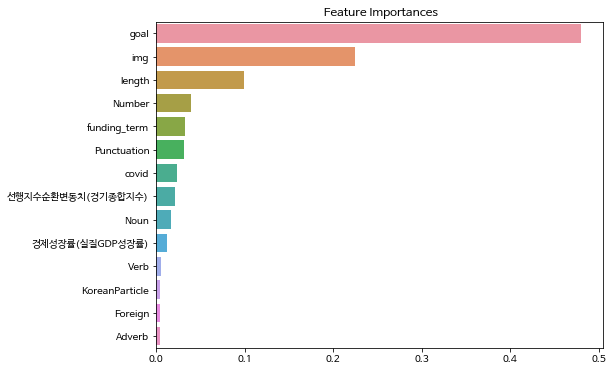

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2022년 학술/okt_total.csv')

In [ ]:
del df['동행지수순환변동치(경기종합지수)']
del df['소비자물가(전년도대비%)']
del df['취업자증감(%)']
del df['실업률(%)']
del df['청년실업률(%)']

In [ ]:
del df['생산자물가(전월대비%)']

In [ ]:
df.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9.968000e+03,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,2.511136,0.569823,7.218800,0.046549,0.965991,0.093299,0.163323,1.432566e+06,50.191914,34.944723,18.349017,99.678331,1.862721,13109.049157,0.823535
std,1.459076,0.786117,2.169218,0.214925,0.944187,0.310873,0.411790,3.740636e+06,34.758015,6.100135,7.750581,1.199472,2.407586,51181.653078,0.381234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,5.000000,3.000000,97.900000,-2.500000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,26.000000,32.000000,13.000000,98.600000,-0.900000,15.000000,1.000000
50%,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,43.000000,37.000000,18.000000,99.600000,2.200000,320.000000,1.000000
75%,3.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,66.000000,40.000000,22.000000,100.600000,3.000000,1507.000000,1.000000
max,9.000000,5.000000,14.000000,2.000000,6.000000,3.000000,5.000000,1.000000e+08,317.000000,40.000000,83.000000,101.900000,6.200000,621136.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

스케일링후 = df.copy()
독립변수 = 스케일링후.drop(['pf'], axis=1)

scaler = MinMaxScaler()
스케일링후.loc[:, 독립변수.columns] = scaler.fit_transform(독립변수)
df = 스케일링후.copy()

In [ ]:
df.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,0.279015,0.113965,0.515629,0.023274,0.160999,0.031100,0.032665,0.009373,0.158334,0.855564,0.191863,0.444583,0.501462,0.021105,0.823535
std,0.162120,0.157223,0.154944,0.107462,0.157364,0.103624,0.082358,0.037594,0.109647,0.174290,0.096882,0.299868,0.276734,0.082400,0.381234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.082019,0.771429,0.125000,0.175000,0.183908,0.000024,1.000000
50%,0.222222,0.000000,0.500000,0.000000,0.166667,0.000000,0.000000,0.005025,0.135647,0.914286,0.187500,0.425000,0.540230,0.000515,1.000000
75%,0.333333,0.200000,0.642857,0.000000,0.166667,0.000000,0.000000,0.005025,0.208202,1.000000,0.237500,0.675000,0.632184,0.002426,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### gbt

In [ ]:
x_data = df.drop(['pf'], axis=1)
y_data = df['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.73      0.30      0.43      1227
           1       0.87      0.98      0.92      5750

    accuracy                           0.86      6977
   macro avg       0.80      0.64      0.67      6977
weighted avg       0.84      0.86      0.83      6977

              precision    recall  f1-score   support

           0       0.68      0.25      0.37       532
           1       0.86      0.97      0.91      2459

    accuracy                           0.85      2991
   macro avg       0.77      0.61      0.64      2991
weighted avg       0.83      0.85      0.82      2991



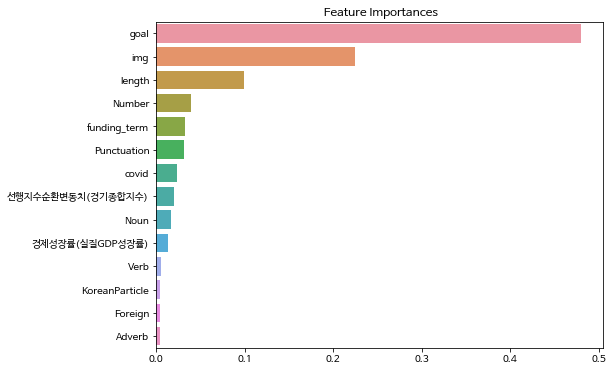

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## standardscale

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2022년 학술/okt_total.csv')

In [ ]:
del df['동행지수순환변동치(경기종합지수)']
del df['소비자물가(전년도대비%)']
del df['취업자증감(%)']
del df['실업률(%)']
del df['청년실업률(%)']

In [ ]:
del df['생산자물가(전월대비%)']

In [ ]:
df.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9.968000e+03,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,2.511136,0.569823,7.218800,0.046549,0.965991,0.093299,0.163323,1.432566e+06,50.191914,34.944723,18.349017,99.678331,1.862721,13109.049157,0.823535
std,1.459076,0.786117,2.169218,0.214925,0.944187,0.310873,0.411790,3.740636e+06,34.758015,6.100135,7.750581,1.199472,2.407586,51181.653078,0.381234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,0.000000,5.000000,3.000000,97.900000,-2.500000,0.000000,0.000000
25%,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,26.000000,32.000000,13.000000,98.600000,-0.900000,15.000000,1.000000
50%,2.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,43.000000,37.000000,18.000000,99.600000,2.200000,320.000000,1.000000
75%,3.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+06,66.000000,40.000000,22.000000,100.600000,3.000000,1507.000000,1.000000
max,9.000000,5.000000,14.000000,2.000000,6.000000,3.000000,5.000000,1.000000e+08,317.000000,40.000000,83.000000,101.900000,6.200000,621136.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

스케일링후 = df.copy()
독립변수 = 스케일링후.drop(['pf'], axis=1)

scaler = StandardScaler()
스케일링후.loc[:, 독립변수.columns] = scaler.fit_transform(독립변수)
df = 스케일링후.copy()

In [ ]:
df.describe()

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf
count,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9.968000e+03,9968.000000
mean,3.421554e-17,-1.140518e-17,-2.052932e-16,7.413367e-17,-2.851295e-17,-2.031548e-17,-4.562072e-17,2.566166e-17,6.272849e-17,3.991813e-16,-1.924624e-16,3.147830e-15,-1.368622e-16,-1.140518e-17,0.823535
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.381234
min,-1.721132e+00,-7.248949e-01,-3.328002e+00,-2.165936e-01,-1.023144e+00,-3.001328e-01,-3.966366e-01,-2.493194e-01,-1.444111e+00,-4.909108e+00,-1.980469e+00,-1.482669e+00,-1.812163e+00,-2.561407e-01,0.000000
25%,-1.035732e+00,-7.248949e-01,-5.618897e-01,-2.165936e-01,-1.023144e+00,-3.001328e-01,-3.966366e-01,-2.493194e-01,-6.960446e-01,-4.827550e-01,-6.901786e-01,-8.990493e-01,-1.147564e+00,-2.558477e-01,1.000000
50%,-3.503323e-01,-7.248949e-01,-1.008710e-01,-2.165936e-01,3.602097e-02,-3.001328e-01,-3.966366e-01,-1.156456e-01,-2.069242e-01,3.369401e-01,-4.503331e-02,-6.530754e-02,1.400973e-01,-2.498882e-01,1.000000
75%,3.350675e-01,5.472446e-01,8.211664e-01,-2.165936e-01,3.602097e-02,-3.001328e-01,-3.966366e-01,-1.156456e-01,4.548269e-01,8.287571e-01,4.710829e-01,7.684342e-01,4.723969e-01,-2.266951e-01,1.000000
max,4.447466e+00,5.635802e+00,3.126260e+00,9.089464e+00,5.331848e+00,9.350588e+00,1.174610e+01,2.635177e+01,7.676545e+00,8.287571e-01,8.341855e+00,1.852299e+00,1.801596e+00,1.188038e+01,1.000000


### gbt

In [ ]:
x_data = df.drop(['pf'], axis=1)
y_data = df['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.73      0.30      0.43      1227
           1       0.87      0.98      0.92      5750

    accuracy                           0.86      6977
   macro avg       0.80      0.64      0.67      6977
weighted avg       0.84      0.86      0.83      6977

              precision    recall  f1-score   support

           0       0.68      0.25      0.37       532
           1       0.86      0.97      0.91      2459

    accuracy                           0.85      2991
   macro avg       0.77      0.61      0.64      2991
weighted avg       0.83      0.85      0.82      2991



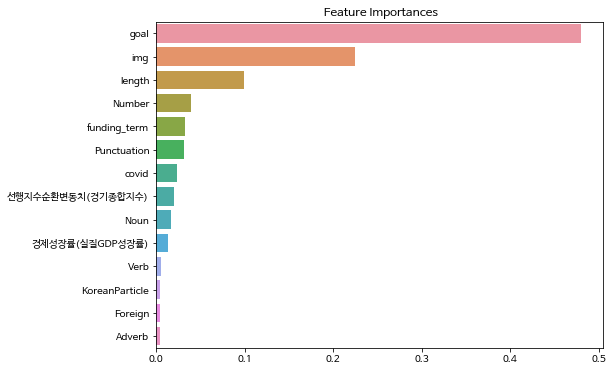

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/2022년 학술/코스피붙인.csv')

In [ ]:
df3

,Unnamed: 0,title,maker,intro,main,post,comment,supporter,goal,term,achivement_rate,funding,like,img,start_date,finish_date,mini,maxi,medi
0,0,"[14K l 18K] 내일이 더 가치있는 영원한 무드 ""한돈 클래식링""",스테이 컴퍼니,한철끼고 마는 반지는 이제 그만! 오늘보다 내일이 더 가치있는 영원한 무드 한돈 클...,안녕하세요. 스테이잼 브랜드를 운영하고 있는 대표 허재은입니다.주얼리는 인생의 전반...,11,18,85,1000000,2022.08.09-2022.08.16,3429,34290000,73,24,20220809,20220816,2480.879883,2533.52002,2523.780029
1,1,좋은 소재로 바르게 설계한 정직한 안경 | 지아애체,지아애체,"ひろみ [ 히로미 : 아름답다 ] , つぎの鼻 [ 츠키코 : 달의 아이 ] 이번 프...",질리지 않는 디자인과 유려한 탄성으로오랫동안 사랑 받은 클래식 안경의 재해석클래식 ...,0,3,70,500000,2022.08.09-2022.08.16,1199,5999500,44,27,20220809,20220816,2480.879883,2533.52002,2523.780029
2,2,[ 종료 즉시 배송 ] 썸머 쿨링 릴렉스 와이드 밴딩 팬츠 !,리버토우,앵콜 ! 여름 바지 끝판 왕 와이드 밴딩 팬츠 !! 가성비 최고의 바지 ! 패션도 ...,고중량 팬츠 드라이아이스 실험 비교썸머쿨링 와이드 팬츠 드라이아이스 실험 비교Q. ...,3,0,18,500000,2022.08.09-2022.08.16,139,695000,16,25,20220809,20220816,2480.879883,2533.52002,2523.780029
3,3,"[생체역학 테스트완료] 북유럽의 편안함ㅣ한국 첫 런칭""GaitLine""",컨슈,[한국 최초 런칭] 전직 노르웨이 국가대표가 신체의 균형과 올바른 걸음을 위해 만든...,"안녕하세요, CONSHOE 입니다!CONSHOE는 부산신발산업진흥센터에 위치한 신발...",14,73,258,500000,2022.08.08-2022.08.18,9281,46405100,181,45,20220808,20220818,2480.879883,2533.52002,2512.260010
4,4,바다와 일상의 경계를 허무는 수영복,인더노우,언제 어디서든 바다를 즐길 수 있는 2WAY 바다수영복! 이제 오늘의 바다를 내일...,안녕하세요.바다와 일상의 경계를 허무는 인더노우입니다.안녕하세요.제주바다를 너~무 ...,6,1,65,500000,2022.08.07-2022.08.16,1097,5489600,68,62,20220807,20220816,2480.879883,2533.52002,2513.619995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9963,"[글로벌 2억/와디즈 누적 1억] 앵콜, 손바닥보다 작은 지갑 TROVE",이에스투홀딩스,"[글로벌 2억! 와디즈 누적 1억!] 앵콜 프로젝트. 카드, 지갑, 동전을 다 넣어...",오랜만에 다시 인사드리며.17년 동안 섬유 원단을 브랜드에게 납품 하면서 나만의 브...,0,7,0,1000000,2022.07.25-2022.08.25,0,0,361,152,20220725,20220825,2403.689941,2533.52002,2473.110107
9964,9964,"대항해시대 바다 범선의 돛, 빈티지 크랙감이 멋진 왁스 캔버스 토트백",소호디자인,오랜 전통의 헤리티지 원단 왁스 캔버스와 독일의 환경친화적인 페이퍼레더 텍슨이 만났...,"프라운스 텍슨 프로젝트들은 마치, 종이로 만든 것처럼 특이해 보이시지요? 종이인 듯...",2,3,15,500000,2022.07.22-2022.08.22,430,2151000,58,136,20220722,20220822,2393.139893,2533.52002,2473.110107
9965,9965,[4.8점] 신개념 접이식카트 업그레이드 된 다담찌 멀티캐리어,디에이치컴퍼니,4.8점의 만족도/ 극찬후기의 다담찌가 업그레이드 되어 돌아왔습니다. 다담찌만 있으...,1. 50L 대용량 수납력과 견고한 내구성 (최대하중 30kg)다담찌의 50L 대용...,7,15,95,500000,2022.07.22-2022.08.31,942,4711000,122,46,20220722,20220831,2393.139893,2533.52002,2467.275024
9966,9966,우아함이 가득한 여성들을 위한 셔츠,브와브,저희 브와브만이 가진 우아함을 담았으며 여성이 가진 본연의 유려함과 아름다움을 표현...,매력적인 셔츠 카라이번 브와브 셔츠의 매력포인트는 단연 유려함을 담은 셔츠카라입니다...,1,0,10,500000,2022.07.11-2022.08.22,102,511000,10,49,20220711,20220822,2317.760010,2533.52002,2445.560059


In [ ]:
df.columns

Index(['Punctuation', 'Number', 'Noun', 'KoreanParticle', 'Verb', 'Adverb',
       'Foreign', 'goal', 'img', 'length', 'funding_term', '생산자물가(전월대비%)',
       '동행지수순환변동치(경기종합지수)', '선행지수순환변동치(경기종합지수)', '소비자물가(전년도대비%)', '취업자증감(%)',
       '실업률(%)', '청년실업률(%)', '경제성장률(실질GDP성장률)', 'covid', 'pf'],
      dtype='object')

In [ ]:
df['mini'] = df3['mini']
df['maxi'] = df3['maxi']
df['medi'] = df3['medi']

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,...,소비자물가(전년도대비%),취업자증감(%),실업률(%),청년실업률(%),경제성장률(실질GDP성장률),covid,pf,mini,maxi,medi
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,1000000,24,40,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,500000,27,28,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,25,35,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,500000,45,39,...,5.7,80.7,2.1,5.4,3.1,55242.0,1,2480.879883,2533.52002,2512.260010
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,500000,62,19,...,5.7,80.7,2.1,5.4,3.1,105455.0,1,2480.879883,2533.52002,2513.619995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1000000,152,40,...,6.3,82.6,2.9,6.8,2.9,35852.0,0,2403.689941,2533.52002,2473.110107
9964,1.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,136,38,...,6.3,82.6,2.9,6.8,2.9,68588.0,1,2393.139893,2533.52002,2473.110107
9965,2.0,1.0,9.0,0.0,1.0,0.0,0.0,500000,46,34,...,6.3,82.6,2.9,6.8,2.9,68588.0,1,2393.139893,2533.52002,2467.275024
9966,0.0,0.0,3.0,0.0,0.0,0.0,0.0,500000,49,19,...,6.3,82.6,2.9,6.8,2.9,12672.0,1,2317.760010,2533.52002,2445.560059


In [ ]:
del df['동행지수순환변동치(경기종합지수)']
del df['소비자물가(전년도대비%)']
del df['취업자증감(%)']
del df['실업률(%)']
del df['청년실업률(%)']

In [ ]:
del df['생산자물가(전월대비%)']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

스케일링후 = df.copy()
독립변수 = 스케일링후.drop(['pf'], axis=1)

scaler = MinMaxScaler()
스케일링후.loc[:, 독립변수.columns] = scaler.fit_transform(독립변수)
df = 스케일링후.copy()

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,funding_term,선행지수순환변동치(경기종합지수),경제성장률(실질GDP성장률),covid,pf,moin,maxi,medi
0,0.444444,0.4,0.500000,0.0,0.000000,0.0,0.0,0.005025,0.075710,1.000000,0.0500,0.35,0.643678,0.241250,1,0.559618,0.517829,0.553374
1,0.111111,0.0,0.428571,0.0,0.000000,0.0,0.0,0.000000,0.085174,0.657143,0.0500,0.35,0.643678,0.241250,1,0.559618,0.517829,0.553374
2,0.333333,0.0,0.714286,0.0,0.000000,0.0,0.0,0.000000,0.078864,0.857143,0.0500,0.35,0.643678,0.241250,1,0.559618,0.517829,0.553374
3,0.444444,0.0,0.642857,0.5,0.000000,0.0,0.0,0.000000,0.141956,0.971429,0.0875,0.35,0.643678,0.088937,1,0.559618,0.517829,0.546717
4,0.000000,0.0,0.357143,0.0,0.000000,0.0,0.0,0.000000,0.195584,0.400000,0.0750,0.35,0.643678,0.169778,1,0.559618,0.517829,0.547503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,0.444444,0.4,0.428571,0.0,0.000000,0.0,0.0,0.005025,0.479495,1.000000,0.3500,0.40,0.620690,0.057720,0,0.517403,0.517829,0.524094
9964,0.111111,0.0,0.714286,0.0,0.000000,0.0,0.0,0.000000,0.429022,0.942857,0.3500,0.40,0.620690,0.110423,1,0.511633,0.517829,0.524094
9965,0.222222,0.2,0.642857,0.0,0.166667,0.0,0.0,0.000000,0.145110,0.828571,0.4625,0.40,0.620690,0.110423,1,0.511633,0.517829,0.520722
9966,0.000000,0.0,0.214286,0.0,0.000000,0.0,0.0,0.000000,0.154574,0.400000,0.4875,0.40,0.620690,0.020401,1,0.470407,0.517829,0.508174


In [ ]:
x_data = df.drop(['pf'], axis=1)
y_data = df['pf']

In [ ]:
y_train.value_counts()

1    5750
0    1227
Name: pf, dtype: int64

In [ ]:
y_test.value_counts()

1    2459
0     532
Name: pf, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.76      0.31      0.44      1227
           1       0.87      0.98      0.92      5750

    accuracy                           0.86      6977
   macro avg       0.82      0.65      0.68      6977
weighted avg       0.85      0.86      0.84      6977

              precision    recall  f1-score   support

           0       0.69      0.25      0.37       532
           1       0.86      0.98      0.91      2459

    accuracy                           0.85      2991
   macro avg       0.77      0.61      0.64      2991
weighted avg       0.83      0.85      0.82      2991



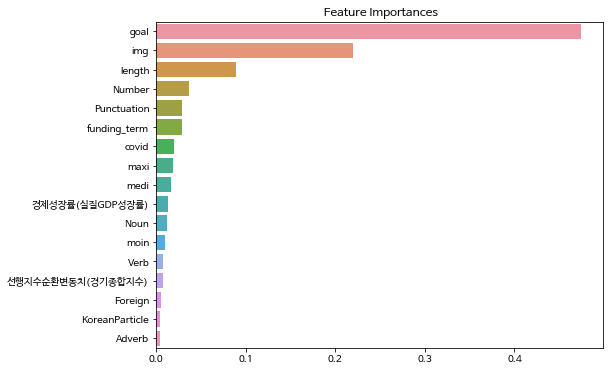

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
df['pf'].value_counts()

1    8209
0    1759
Name: pf, dtype: int64

In [ ]:
#df.to_csv('/content/drive/MyDrive/2022년 학술/okt_total_코스피.csv', index = False)

In [ ]:
maker = pd.read_csv('/content/drive/MyDrive/2022년 학술/펀딩메이커.csv')

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,goal,img,length,...,소비자물가(전년도대비%),취업자증감(%),실업률(%),청년실업률(%),경제성장률(실질GDP성장률),covid,pf,mini,maxi,medi
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,1000000,24,40,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,500000,27,28,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,25,35,...,5.7,80.7,2.1,5.4,3.1,149849.0,1,2480.879883,2533.52002,2523.780029
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,500000,45,39,...,5.7,80.7,2.1,5.4,3.1,55242.0,1,2480.879883,2533.52002,2512.260010
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,500000,62,19,...,5.7,80.7,2.1,5.4,3.1,105455.0,1,2480.879883,2533.52002,2513.619995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1000000,152,40,...,6.3,82.6,2.9,6.8,2.9,35852.0,0,2403.689941,2533.52002,2473.110107
9964,1.0,0.0,10.0,0.0,0.0,0.0,0.0,500000,136,38,...,6.3,82.6,2.9,6.8,2.9,68588.0,1,2393.139893,2533.52002,2473.110107
9965,2.0,1.0,9.0,0.0,1.0,0.0,0.0,500000,46,34,...,6.3,82.6,2.9,6.8,2.9,68588.0,1,2393.139893,2533.52002,2467.275024
9966,0.0,0.0,3.0,0.0,0.0,0.0,0.0,500000,49,19,...,6.3,82.6,2.9,6.8,2.9,12672.0,1,2317.760010,2533.52002,2445.560059


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2022년 학술/최종데이터_최종.csv')

In [ ]:
df.columns

Index(['Punctuation', 'Number', 'Noun', 'KoreanParticle', 'Verb', 'Adverb',
       'Foreign', 'Alpha', 'Josa', 'Adjective',
       ...
       '하나', '하나로', '한국', '한복', '한정', '핸드', '후드', 'sucess', 'fail', 'new'],
      dtype='object', length=140)

In [ ]:
df

,Punctuation,Number,Noun,KoreanParticle,Verb,Adverb,Foreign,Alpha,Josa,Adjective,...,하나,하나로,한국,한복,한정,핸드,후드,sucess,fail,new
0,4.0,2.0,7.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,35.0,1.0,0.0
2,3.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,14.0,1.0,0.0
3,4.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.737816,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,4.0,2.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9963,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,28.0,0.0,0.0
9964,2.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9965,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df1 = df[['Number','Punctuation','Modifier','Verb','Noun','Adjective','앵콜','맨투맨','가죽','데일리','sucess', 'fail', 'new','covid','goal', 'img', 'length', 'funding_term','mini','maxi','medi','pf']]

In [ ]:
df1.describe()

,Number,Punctuation,Modifier,Verb,Noun,Adjective,앵콜,맨투맨,가죽,데일리,...,new,covid,goal,img,length,funding_term,mini,maxi,medi,pf
count,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,...,9967.000000,9967.000000,9.967000e+03,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
mean,0.569881,2.511087,0.293769,0.965988,7.218722,0.589947,0.073128,0.013882,0.032677,0.018491,...,0.567573,13110.331895,1.432610e+06,50.189726,34.944216,18.348751,2464.399433,2594.103806,2536.347596,0.823518
std,0.786136,1.459141,0.651635,0.944234,2.169313,0.782171,0.190500,0.100813,0.133247,0.108537,...,0.495438,51184.060590,3.740821e+06,34.759072,6.100231,7.750925,461.747929,454.402795,455.580879,0.381249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000e+05,0.000000,5.000000,3.000000,1457.640015,1704.760010,1566.150024,0.000000
25%,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15.000000,5.000000e+05,26.000000,32.000000,13.000000,2076.770020,2187.929932,2132.890015,1.000000
50%,0.000000,2.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,320.000000,1.000000e+06,43.000000,37.000000,18.000000,2341.530029,2481.030029,2406.424927,1.000000
75%,1.000000,3.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1507.000000,1.000000e+06,66.000000,40.000000,22.000000,2924.919922,3049.080078,3001.800049,1.000000
max,5.000000,9.000000,6.000000,6.000000,14.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,621136.000000,1.000000e+08,317.000000,40.000000,83.000000,3286.100098,3305.209961,3296.679932,1.000000


In [ ]:
df1.columns

Index(['Number', 'Punctuation', 'Modifier', 'Verb', 'Noun', 'Adjective', '앵콜',
       '맨투맨', '가죽', '데일리', 'sucess', 'fail', 'new', 'covid', 'goal', 'img',
       'length', 'funding_term', 'mini', 'maxi', 'medi', 'pf'],
      dtype='object')

In [ ]:
x_data = df1.drop(['pf'], axis=1)
y_data = df1['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.48      0.60      1248
           1       0.90      0.97      0.93      5728

    accuracy                           0.89      6976
   macro avg       0.85      0.73      0.77      6976
weighted avg       0.88      0.89      0.87      6976

              precision    recall  f1-score   support

           0       0.74      0.43      0.54       511
           1       0.89      0.97      0.93      2480

    accuracy                           0.88      2991
   macro avg       0.82      0.70      0.74      2991
weighted avg       0.87      0.88      0.86      2991



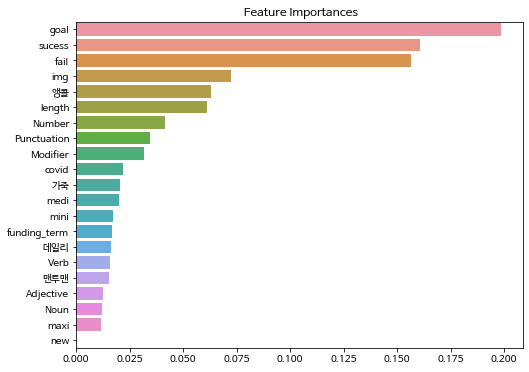

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_predict_train = xgb.predict(x_train)
y_predict = xgb.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1248
           1       0.90      0.98      0.94      5728

    accuracy                           0.89      6976
   macro avg       0.86      0.74      0.78      6976
weighted avg       0.88      0.89      0.88      6976

              precision    recall  f1-score   support

           0       0.73      0.42      0.53       511
           1       0.89      0.97      0.93      2480

    accuracy                           0.87      2991
   macro avg       0.81      0.69      0.73      2991
weighted avg       0.86      0.87      0.86      2991



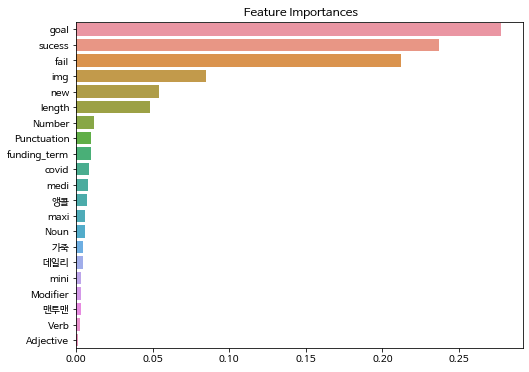

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = gbt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      5728

    accuracy                           1.00      6976
   macro avg       1.00      1.00      1.00      6976
weighted avg       1.00      1.00      1.00      6976

              precision    recall  f1-score   support

           0       0.71      0.42      0.53       511
           1       0.89      0.96      0.93      2480

    accuracy                           0.87      2991
   macro avg       0.80      0.69      0.73      2991
weighted avg       0.86      0.87      0.86      2991



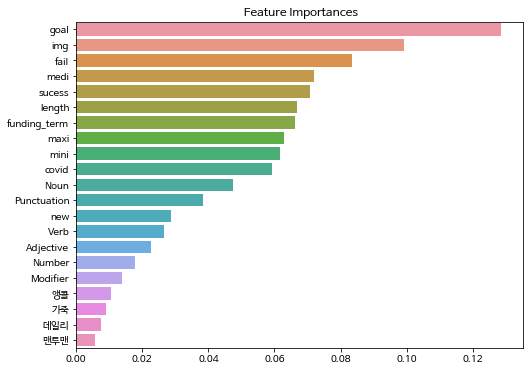

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_predict_train = rf.predict(x_train)
y_predict = rf.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1248
           1       1.00      1.00      1.00      5728

    accuracy                           1.00      6976
   macro avg       1.00      1.00      1.00      6976
weighted avg       1.00      1.00      1.00      6976

              precision    recall  f1-score   support

           0       0.71      0.42      0.53       511
           1       0.89      0.96      0.93      2480

    accuracy                           0.87      2991
   macro avg       0.80      0.69      0.73      2991
weighted avg       0.86      0.87      0.86      2991



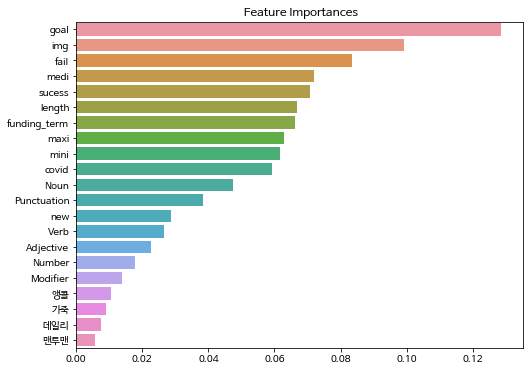

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
lgbm = RandomForestClassifier(random_state=42)
lgbm.fit(x_train, y_train)
y_predict_train = lgbm.predict(x_train)
y_predict = lgbm.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

스케일링후 = df1.copy()
독립변수 = 스케일링후.drop(['pf'], axis=1)

scaler = MinMaxScaler()
스케일링후.loc[:, 독립변수.columns] = scaler.fit_transform(독립변수)
df1 = 스케일링후.copy()

In [ ]:
#df1.to_csv('/content/drive/MyDrive/2022년 학술/R2.csv', index = False)

In [ ]:
df1

,Number,Punctuation,Modifier,Verb,Noun,Adjective,앵콜,맨투맨,가죽,데일리,...,new,covid,goal,img,length,funding_term,mini,maxi,medi,pf
0,2.0,4.0,0.0,0.0,7.0,2.0,0.000000,0.0,0.0,0.0,...,1.0,149849.0,1000000,24,40,7,2480.879883,2533.52002,2523.780029,1
1,0.0,1.0,0.0,0.0,6.0,2.0,0.000000,0.0,0.0,0.0,...,0.0,149849.0,500000,27,28,7,2480.879883,2533.52002,2523.780029,1
2,0.0,3.0,0.0,0.0,10.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,149849.0,500000,25,35,7,2480.879883,2533.52002,2523.780029,1
3,0.0,4.0,0.0,0.0,9.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,55242.0,500000,45,39,10,2480.879883,2533.52002,2512.260010,1
4,0.0,0.0,0.0,0.0,5.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,105455.0,500000,62,19,9,2480.879883,2533.52002,2513.619995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,2.0,4.0,1.0,0.0,6.0,1.0,0.528866,0.0,0.0,0.0,...,1.0,35852.0,1000000,152,40,31,2403.689941,2533.52002,2473.110107,0
9963,0.0,1.0,0.0,0.0,10.0,1.0,0.000000,0.0,0.0,0.0,...,0.0,68588.0,500000,136,38,31,2393.139893,2533.52002,2473.110107,1
9964,1.0,2.0,1.0,1.0,9.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,68588.0,500000,46,34,40,2393.139893,2533.52002,2467.275024,1
9965,0.0,0.0,0.0,0.0,3.0,2.0,0.000000,0.0,0.0,0.0,...,1.0,12672.0,500000,49,19,42,2317.760010,2533.52002,2445.560059,1


In [ ]:
x_data = df1.drop(['pf'], axis=1)
y_data = df1['pf']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators' : [50,100,150,200],
          'learning_rate' : [0.001,0.01, 0.1],
          'max_depth' : [3,4,5,6,7],
          'min_samples_leaf' : [1,2,3]
          }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gs = GridSearchCV(GradientBoostingClassifier(random_state=42), params, n_jobs=-1, cv = 10)

In [ ]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gbt = GradientBoostingClassifier(random_state=42,learning_rate = 0.1,
 max_depth = 4,
 min_samples_leaf = 1,
 n_estimators = 50)
gbt.fit(x_train, y_train)
y_predict_train = gbt.predict(x_train)
y_predict = gbt.predict(x_test)

print(classification_report(y_train, y_predict_train))
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63      1248
           1       0.90      0.98      0.94      5728

    accuracy                           0.89      6976
   macro avg       0.87      0.74      0.78      6976
weighted avg       0.89      0.89      0.88      6976

              precision    recall  f1-score   support

           0       0.75      0.44      0.56       511
           1       0.89      0.97      0.93      2480

    accuracy                           0.88      2991
   macro avg       0.82      0.71      0.74      2991
weighted avg       0.87      0.88      0.87      2991

